In [177]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Data for Learning/Sign Language MNIST/3258_5337_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/Data for Learning/Sign Language MNIST/')
zip_ref.close()

In [3]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/content/drive/My Drive/Data for Learning/Sign Language MNIST/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Data for Learning/Sign Language MNIST/sign_mnist_test.csv')

In [4]:
train_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
y_train = train_data['label'].to_numpy()#.reshape(27455,1)
y_test = test_data['label'].to_numpy()
print(y_train.shape[0])


x_train = (train_data.to_numpy())[:,1:]
x_test = (test_data.to_numpy())[:,1:]

print(x_train.shape,x_test.shape)

27455
(27455, 784) (7172, 784)


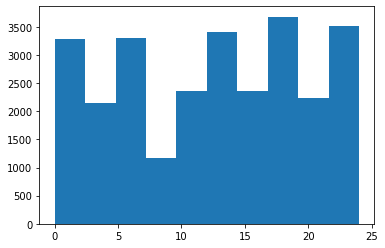

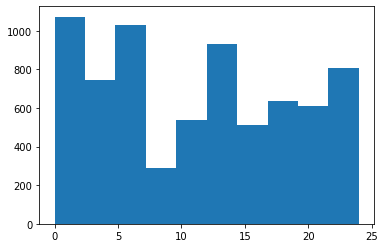

In [50]:
import matplotlib.pyplot as plt

plt.hist(y_train,)
plt.show()
plt.hist(y_test)
plt.show()

In [7]:
alphabet_string = "ABCDEFGHIJKLMNOPQRSTUVWXY"

alphabets = list(alphabet_string)
print(alphabets)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


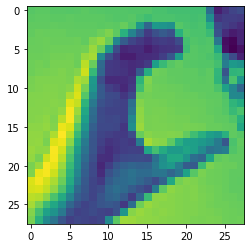

2 C


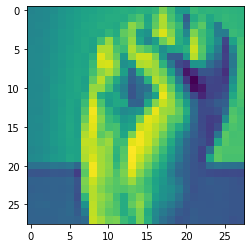

18 S


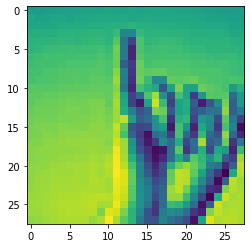

8 I


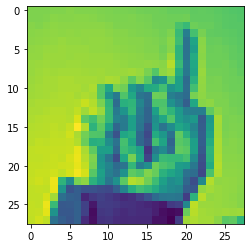

3 D


In [8]:
# visualising data
import matplotlib.pyplot as plt

for i in [2,54,6,9]:
    img = x_train[i,:].reshape(28,28)
    plt.imshow(img)
    plt.show()
    print(y_train[i] ,alphabets[y_train[i]] )

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train,test_size=.15)

In [10]:
X_train = X_train.reshape(-1,28,28,1) #28x28 >> 784 px
X_val = X_val.reshape(-1,28,28,1) #28x28 >> 784 px

x_test = x_test.reshape(-1,28,28,1)
print(X_train.shape)

(23336, 28, 28, 1)


In [95]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.layers import BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# 1st conv
model.add(Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)))
#model.add(BatchNormalization())
#1st pooling layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
#model.add(Dropout(.1))
#model.add(Dense(256,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(25,activation='softmax'))

In [96]:
opt = Adam(learning_rate=.0011)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               819712    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [99]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 15,
    width_shift_range = .15,
    height_shift_range=.15,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
train_generator = train_datagen.flow(X_train,Y_train,batch_size=10)
val_generator = val_datagen.flow(X_val,Y_val,batch_size=10)
test_generator = test_datagen.flow(x_test,y_test,batch_size=10)

In [101]:
history = model.fit(
    train_generator,
    epochs = 20,
    verbose=1,
    validation_data=val_generator
)

Epoch 1/20
2334/2334 [==============================] - 25s 11ms/step - loss: 2.1437 - accuracy: 0.3240 - val_loss: 0.4291 - val_accuracy: 0.7407
Epoch 2/20
2334/2334 [==============================] - 24s 10ms/step - loss: 1.1321 - accuracy: 0.6233 - val_loss: 0.0896 - val_accuracy: 0.8478
Epoch 3/20
2334/2334 [==============================] - 25s 11ms/step - loss: 0.8321 - accuracy: 0.7215 - val_loss: 0.1540 - val_accuracy: 0.9277
Epoch 4/20
2334/2334 [==============================] - 24s 10ms/step - loss: 0.6654 - accuracy: 0.7745 - val_loss: 0.2408 - val_accuracy: 0.9449
Epoch 5/20
2334/2334 [==============================] - 24s 10ms/step - loss: 0.5793 - accuracy: 0.8057 - val_loss: 0.0679 - val_accuracy: 0.9621
Epoch 6/20
2334/2334 [==============================] - 24s 10ms/step - loss: 0.5043 - accuracy: 0.8316 - val_loss: 0.1089 - val_accuracy: 0.9689
Epoch 7/20
2334/2334 [==============================] - 24s 10ms/step - loss: 0.4409 - accuracy: 0.8537 - val_loss: 0.0409 -

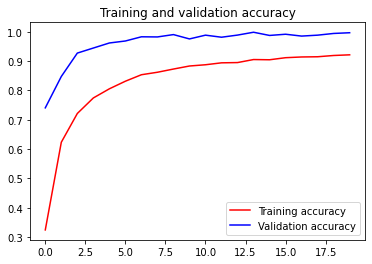

<Figure size 432x288 with 0 Axes>

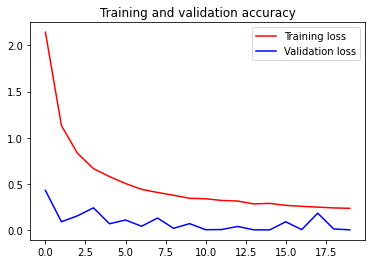

<Figure size 432x288 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


In [103]:
score = model.evaluate(x_test/255.,y_test,verbose = 1)

print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

7172/7172 [==============================] - 1s 114us/step
Test Loss :  0.016640694338909613
Test Accuracy :  0.9967930912971497


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


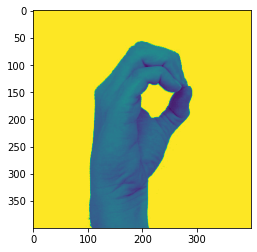

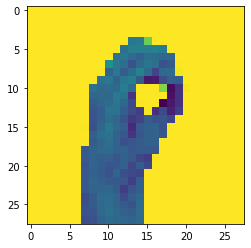

Predicted letter is :  O    14


In [119]:
from keras.preprocessing import image

path = '/content/drive/My Drive/Data for Learning/Sign Language MNIST/O.jpg'
img=image.load_img(path,grayscale=True)
#img_array = image.img_to_array(img)
plt.imshow(img)
plt.show()

img=image.load_img(path,grayscale=True,target_size=(28,28))
img_array = image.img_to_array(img)
plt.imshow(img)
plt.show()

x = np.expand_dims(img_array, axis=0)

images = np.vstack([x])
classes = model.predict(images/255., batch_size=10)

print("Predicted letter is : ",alphabets[np.argmax(classes)],"  ",np.argmax(classes))


In [120]:
print(classes)

[[2.3008345e-16 8.2708770e-12 4.4726641e-03 1.7721520e-11 1.5931520e-12
  1.6184318e-01 2.2830706e-07 2.9939193e-12 1.7025982e-15 5.5248584e-28
  7.8723408e-12 3.9966636e-14 4.5362990e-18 1.0329559e-11 8.3367950e-01
  4.2409538e-06 6.3999124e-08 1.2185805e-15 2.8119141e-13 5.7069631e-08
  1.1632055e-19 9.6049229e-25 5.9125629e-20 5.0047099e-08 2.9862570e-18]]
